# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-19 17:00:03.206883


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/18/20


,12/18/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,17459296,313588,1.80
Brazil,7162978,185650,2.59
India,10004599,145136,1.45
Mexico,1301546,117249,9.01
Italy,1921778,67894,3.53
United Kingdom,1982828,66640,3.36
France,2499529,60345,2.41


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/18/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
58429,US,16973376,2020-12-16,307429.0,3668.0,247403.0,215733.857143
58428,US,16725973,2020-12-15,303761.0,2984.0,198766.0,212285.285714
58427,US,16527207,2020-12-14,300777.0,1484.0,192846.0,215309.285714
58426,US,16334361,2020-12-13,299293.0,1389.0,191142.0,214782.571429
58425,US,16143219,2020-12-12,297904.0,2354.0,219193.0,213297.142857
58424,US,15924026,2020-12-11,295550.0,3283.0,234103.0,212768.428571
58423,US,15689923,2020-12-10,292267.0,2920.0,226684.0,212126.000000


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/18/20


,12/18/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,828166,36177.0,4.37
Texas,1569032,25522.0,1.63
California,1802195,22370.0,1.24
Florida,1181483,20401.0,1.73
New Jersey,423226,18124.0,4.28
Illinois,886805,16206.0,1.83
Pennsylvania,544116,13549.0,2.49


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/18/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1989,California,1708559,2020-12-16,21817.0,397.0,63817.0,37081.714286
1988,California,1644742,2020-12-15,21420.0,276.0,33249.0,32763.714286
1987,California,1611493,2020-12-14,21144.0,104.0,26115.0,31523.571429
1986,California,1585378,2020-12-13,21040.0,82.0,36202.0,31243.571429
1985,California,1549176,2020-12-12,20958.0,171.0,32961.0,30176.428571
1984,California,1516215,2020-12-11,20787.0,184.0,33664.0,29415.428571
1983,California,1482551,2020-12-10,20603.0,192.0,33564.0,28000.142857


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/18/20


,12/18/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,596721,8757.0,1.47
Riverside,141062,1744.0,1.24
Orange,118367,1734.0,1.46
San Bernardino,151113,1323.0,0.88
San Diego,120463,1253.0,1.04
Sacramento,53189,727.0,1.37
Santa Clara,53885,583.0,1.08


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/18/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6305,Los Angeles,566005,2020-12-16,8568.0,137.0,22236.0,12962.000000
6304,Los Angeles,543769,2020-12-15,8431.0,86.0,11039.0,11064.000000
6303,Los Angeles,532730,2020-12-14,8345.0,47.0,7244.0,10692.857143
6302,Los Angeles,525486,2020-12-13,8298.0,29.0,12614.0,10805.000000
6301,Los Angeles,512872,2020-12-12,8269.0,70.0,11237.0,10494.857143
6300,Los Angeles,501635,2020-12-11,8199.0,50.0,13718.0,10150.285714
6299,Los Angeles,487917,2020-12-10,8149.0,74.0,12646.0,9433.714286
6298,Los Angeles,475271,2020-12-09,8075.0,75.0,8950.0,8726.571429
6297,Los Angeles,466321,2020-12-08,8000.0,64.0,8441.0,8275.000000
6296,Los Angeles,457880,2020-12-07,7936.0,27.0,8029.0,8137.285714



7 day new US cases as of 12/18/20


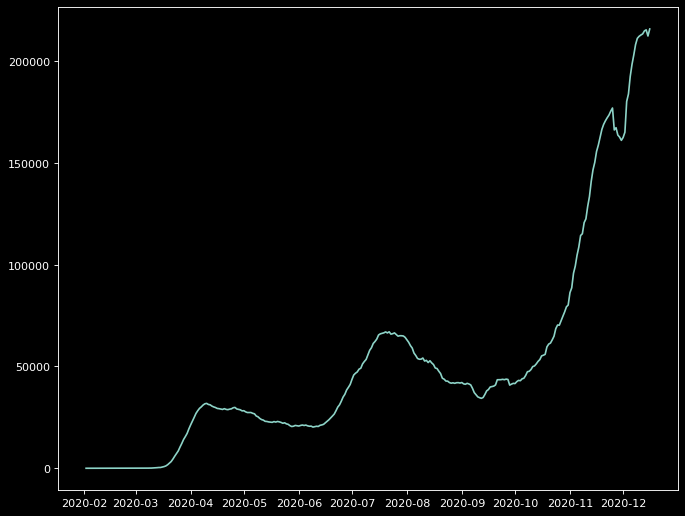

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/18/20


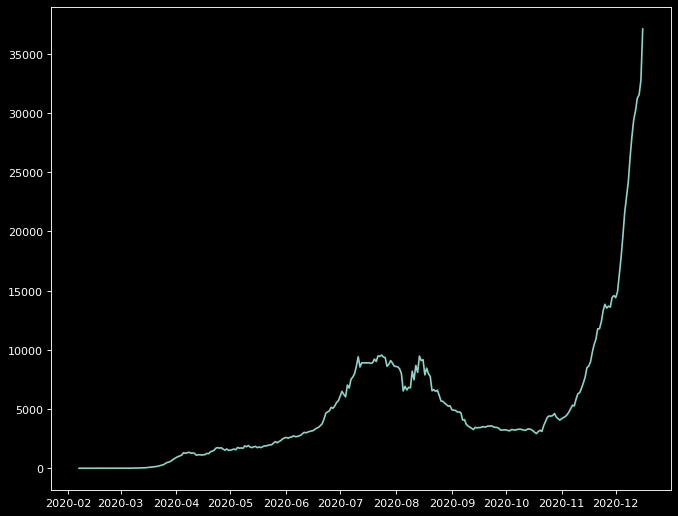

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/18/20


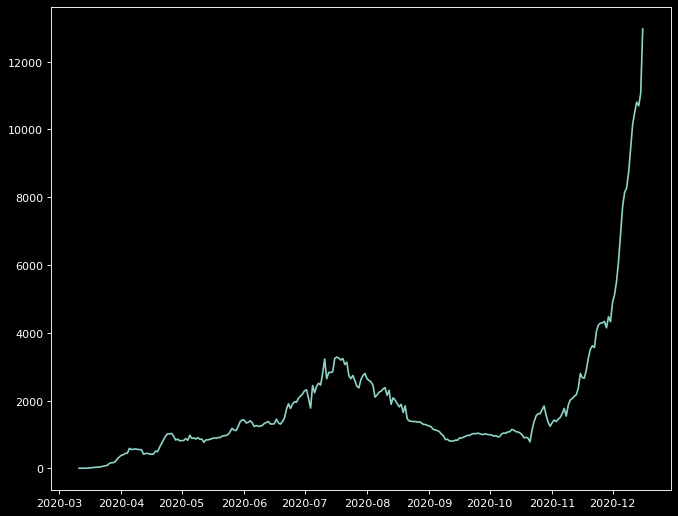

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()